# Introduction

This notebook describes how to hybridize analytical and numerical waveforms given SXS waveform number using sxs pacakage.

This procedure can be divided into four parts

1. Load and store NR waveforms
2. Generate and store PN waveforms
3. Optimize time and phase translation


Let us fisrt import the required pacakegs and libraries 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from Automate_utils import *
from get_sxs import *
import argparse

uncomment and edit the line below to give waveform number

In [3]:
waveformnumber = "0123"
#waveformnumber = "1392"

define constants

In [12]:
T_for_RigRot, T_Hybrid_Interval_Start, T_Hybrid_Interval_End = -0.7, -0.7, -0.3

DISTANCE=300*megaparsec

MASS = 70 * msun

# 1. NR Waveform 

We use sxs pacakge to get NR waveform modes 

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0123v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0123v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
16621 16621
factor=  0.00034478437178805027
16621 16621
12790
16621 16621


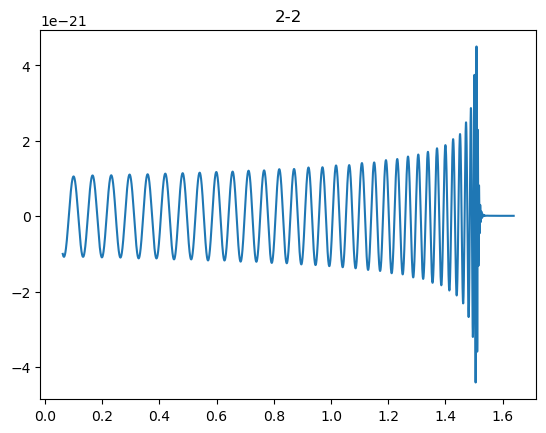

16621 16621


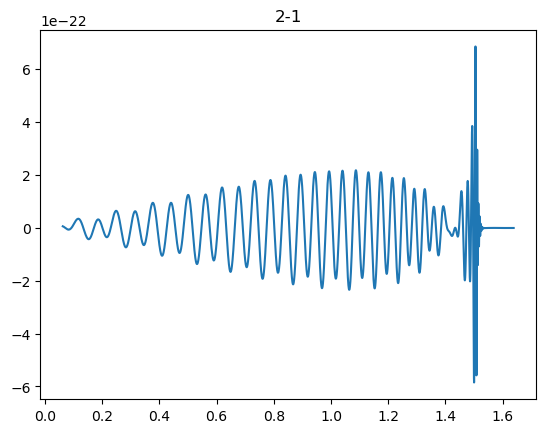

16621 16621


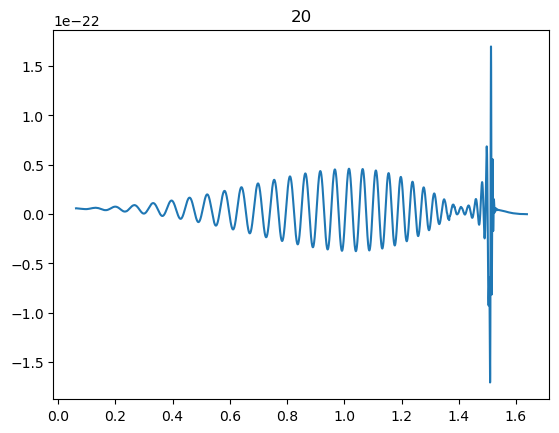

16621 16621


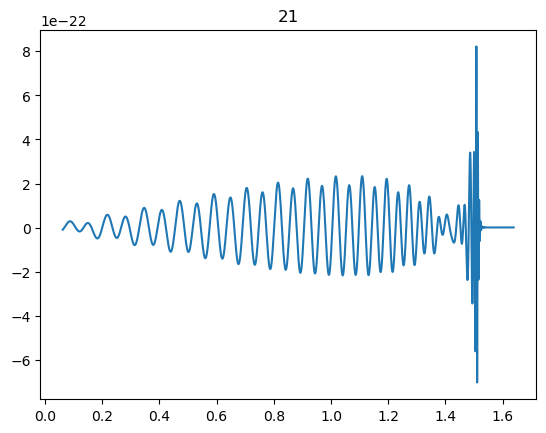

16621 16621


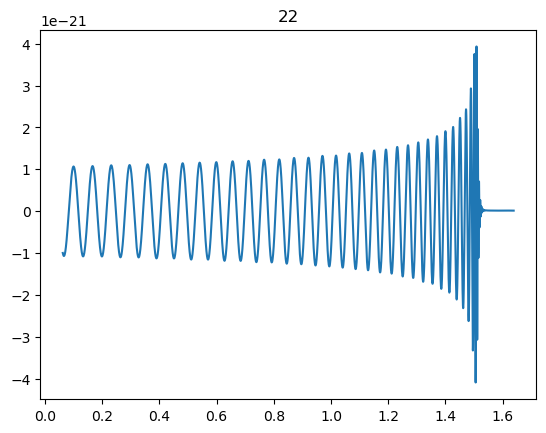

16621 16621


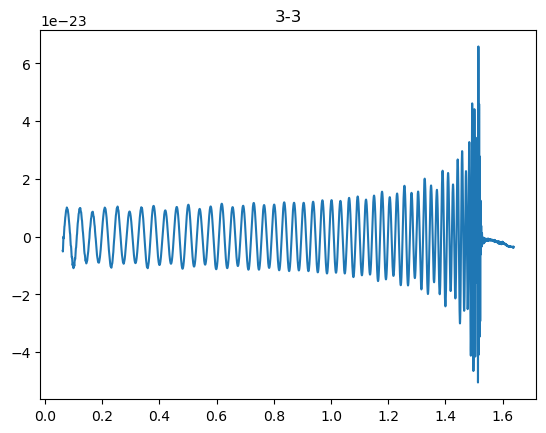

16621 16621


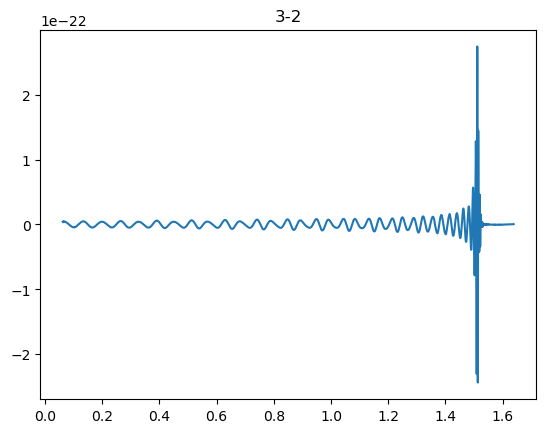

16621 16621


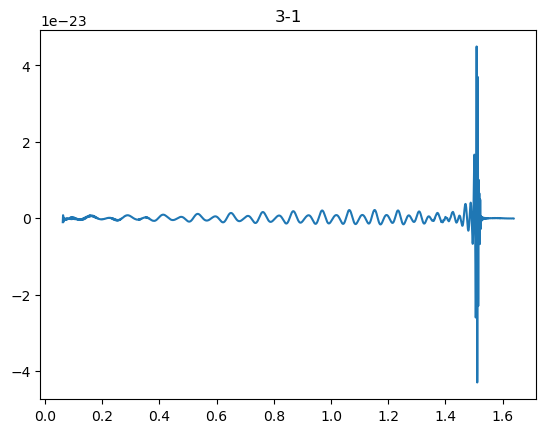

16621 16621


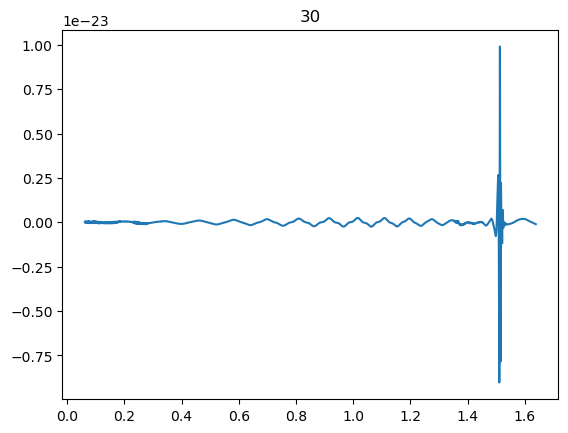

16621 16621


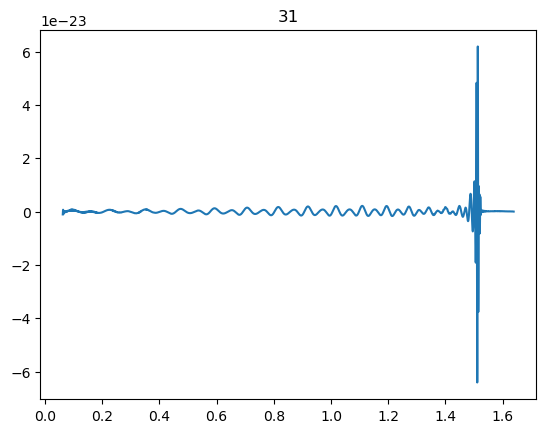

16621 16621


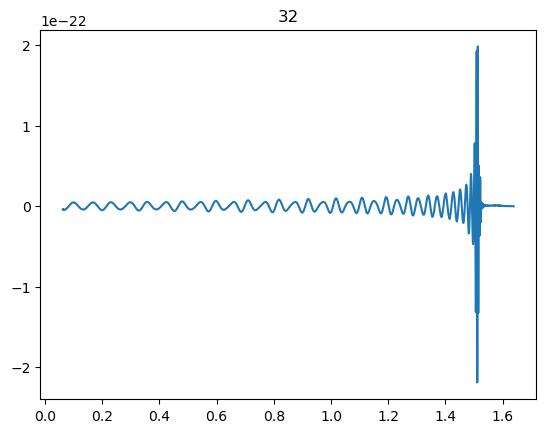

16621 16621


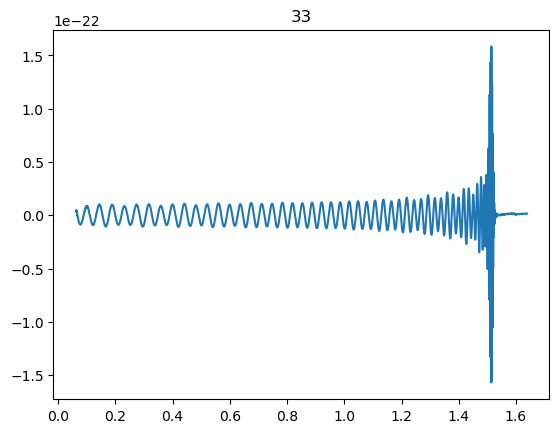

16621 16621


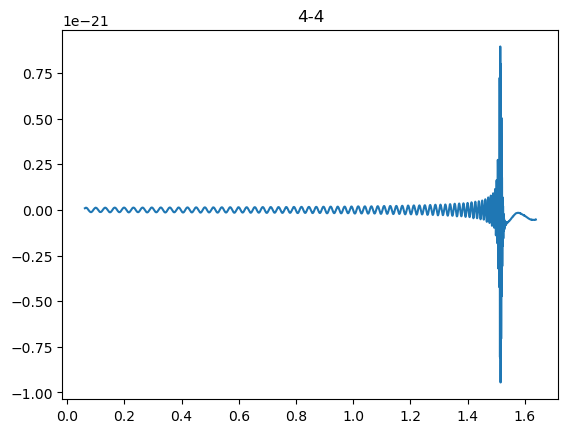

16621 16621


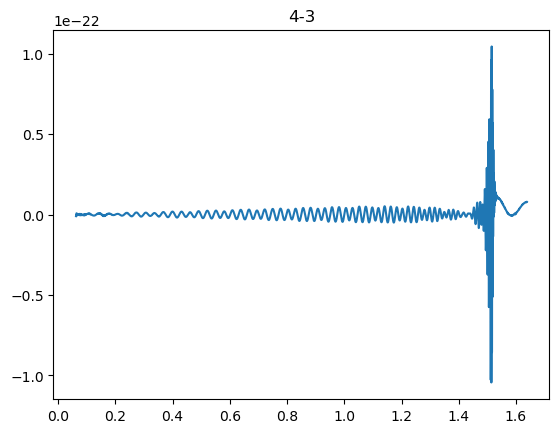

16621 16621


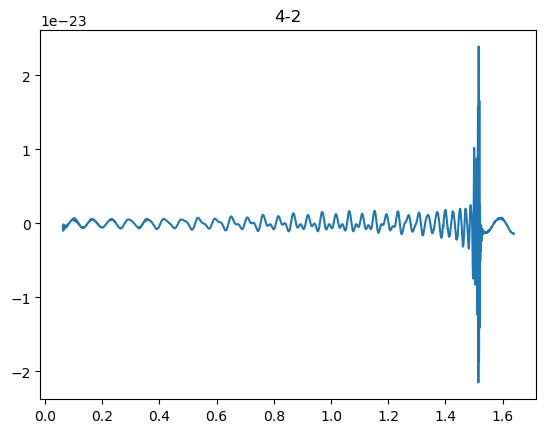

16621 16621


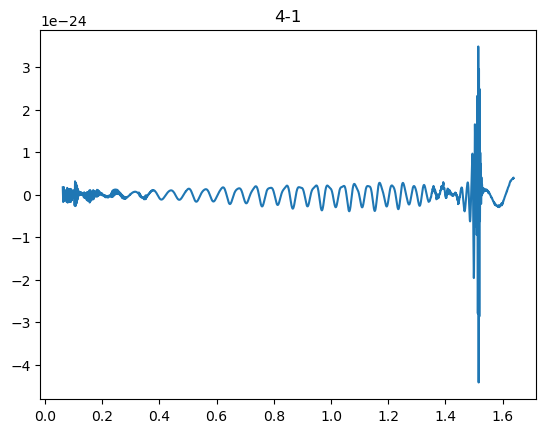

16621 16621


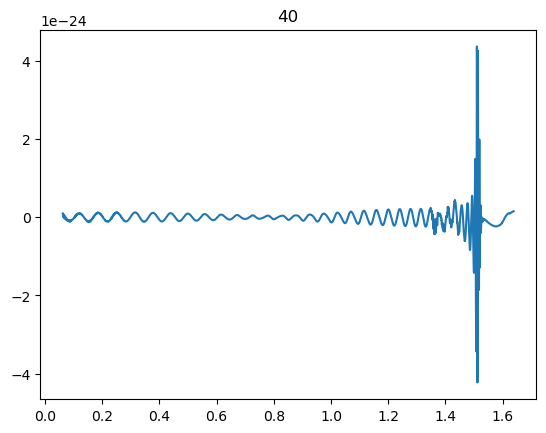

16621 16621


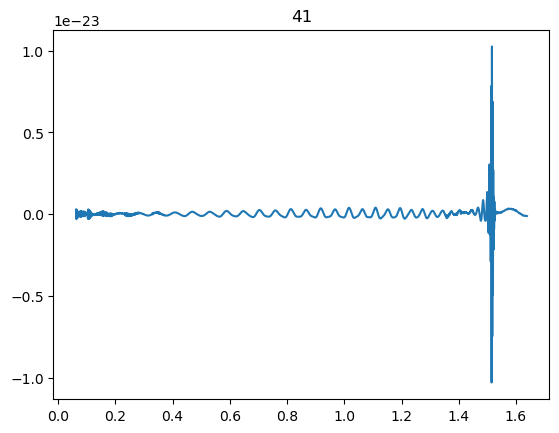

16621 16621


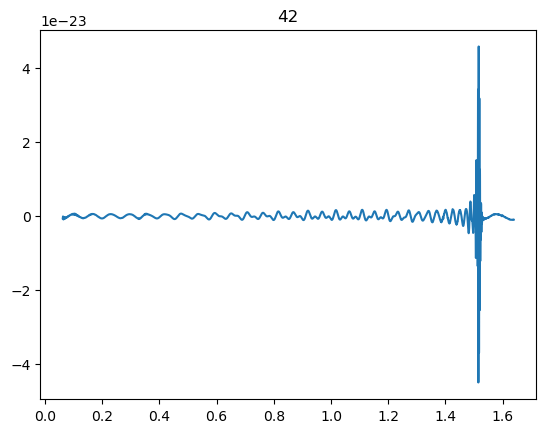

16621 16621


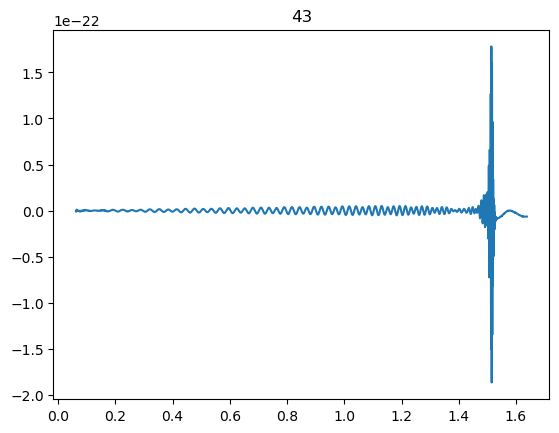

16621 16621


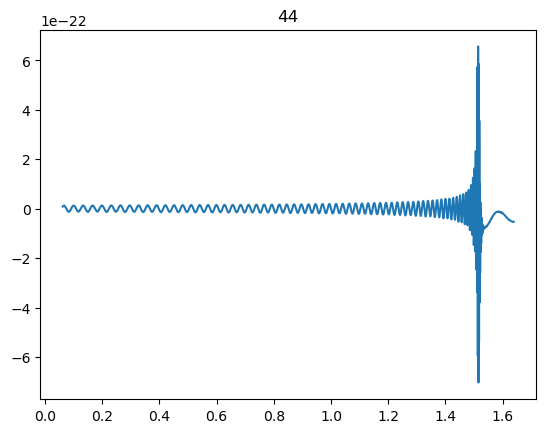

0

In [5]:
get_modes_from_sxs(waveformnumber, MASS=70, DISTANCE=300*megaparsec)

# 2. PN Waveform

To get PN waveform, let us first get parameters(mass, spins, and frequncies) using sxs pacakage.  

In [13]:
metadata = sxs.load("SXS:BBH:"+waveformnumber+"/Lev/metadata.json")
qratio = metadata["reference_mass_ratio"]
Mtotal = 70
spin1 = metadata["reference_dimensionless_spin1"]
spin2 = metadata["reference_dimensionless_spin2"]
forb = metadata["reference_orbital_frequency"]


Found the following files to load from the SXS catalog:
    SXS:BBH:0123v5/Lev5/metadata.json


to get PN waveform we needx to convert orbital frequency into ordinary frequency in hertz

In [14]:
fmag = np.sqrt(forb[0]**2+forb[1]**2+forb[2]**2) 
frefHz = get_fref(fmag,70)
fmin = frefHz

let us now generate PN waveform modes

P.approx =  19
2 -2 4.4071378884093564e-21


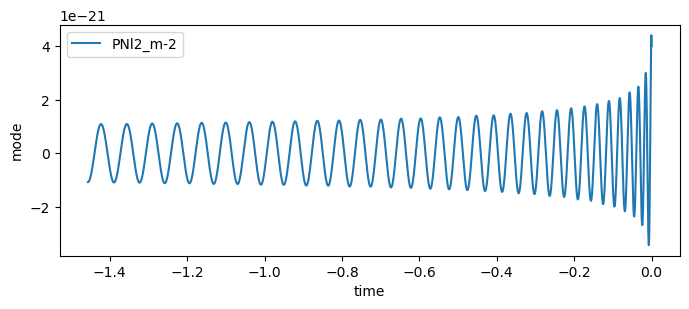

2 -1 3.041368959738415e-22


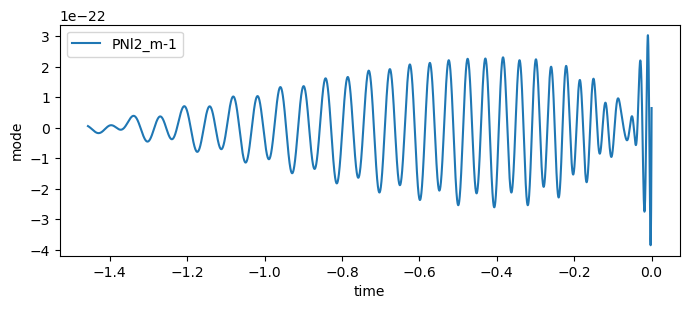

2 0 6.919129303751913e-23


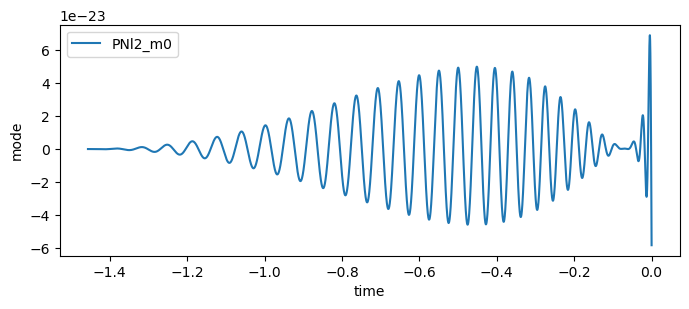

2 1 5.8566167558916e-22


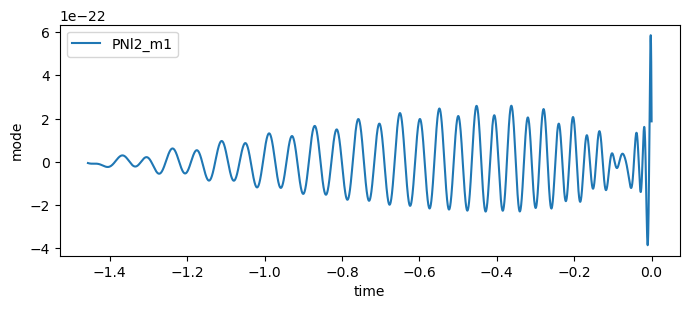

2 2 4.460675984066392e-21


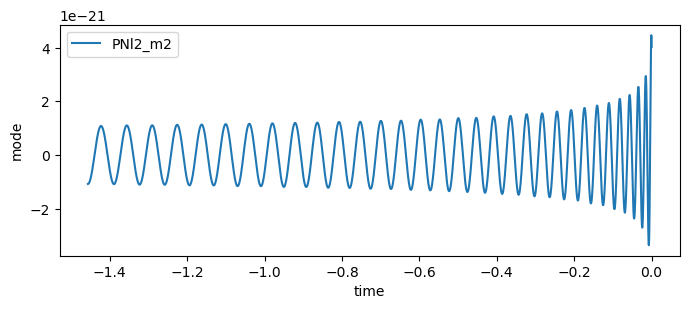

3 -3 3.015630547230709e-23


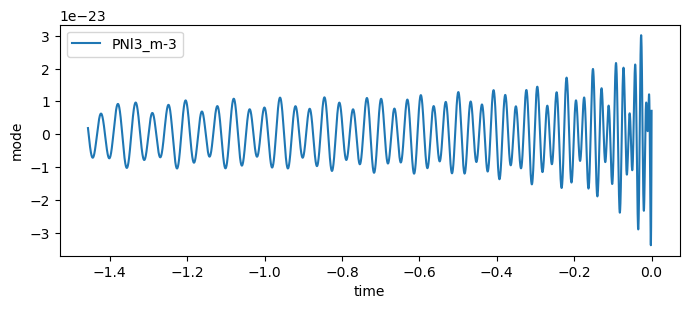

3 -2 2.0855127891003875e-23


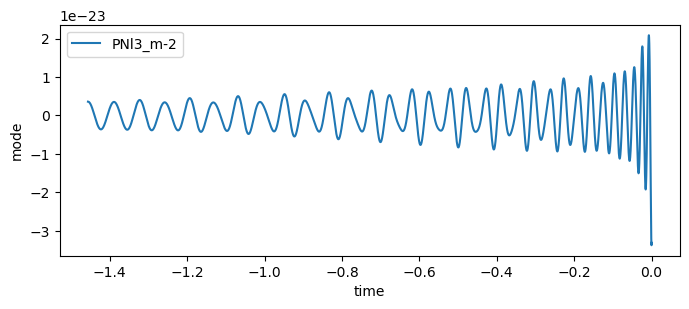

3 -1 6.821384734996683e-24


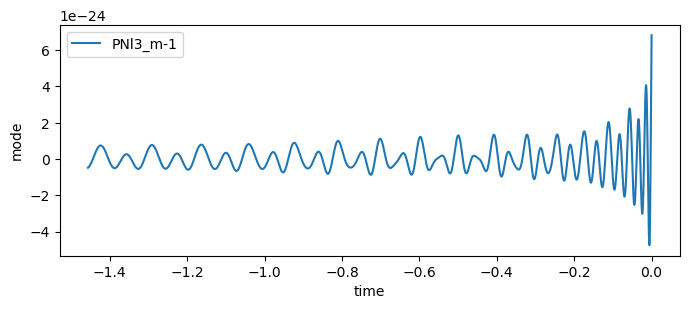

3 0 3.407370883836168e-25


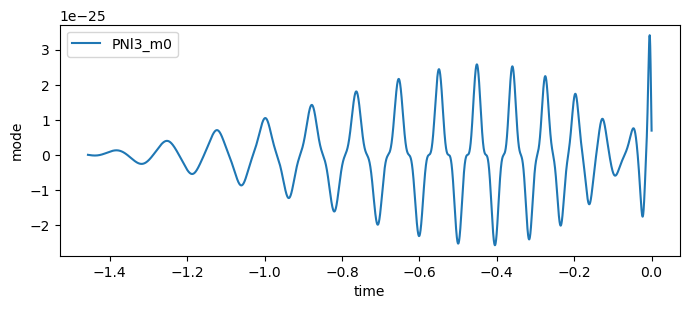

3 1 7.597880102703222e-24


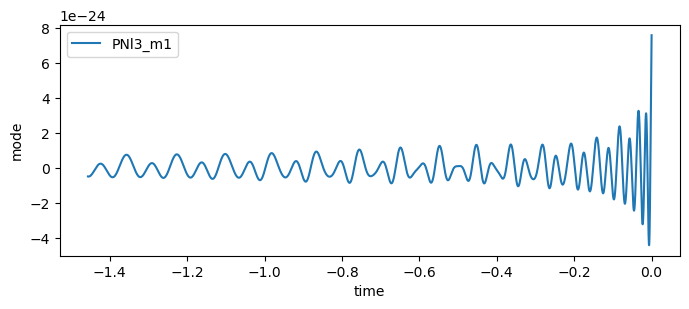

3 2 3.4453247797347715e-23


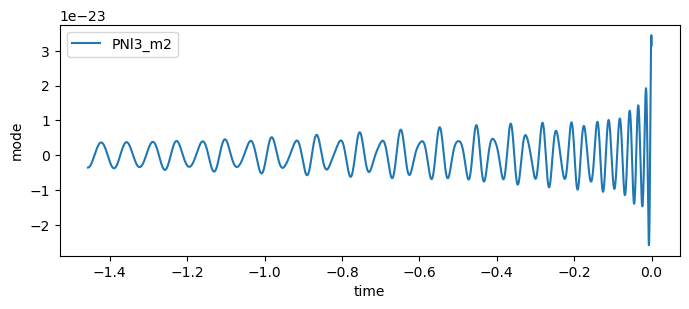

3 3 3.816382901051947e-23


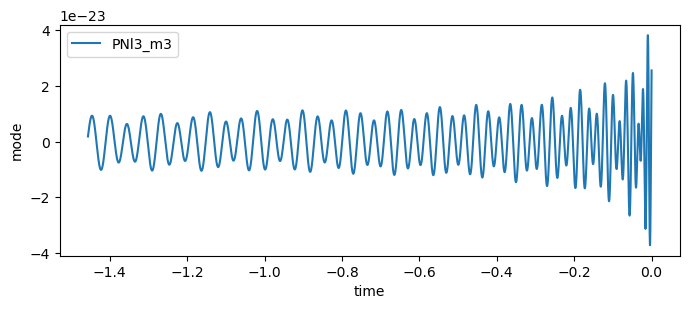

4 -4 1.5225994629582496e-22


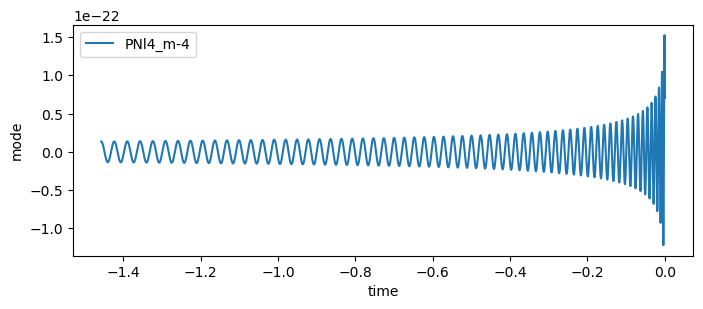

4 -3 2.2307703194479408e-23


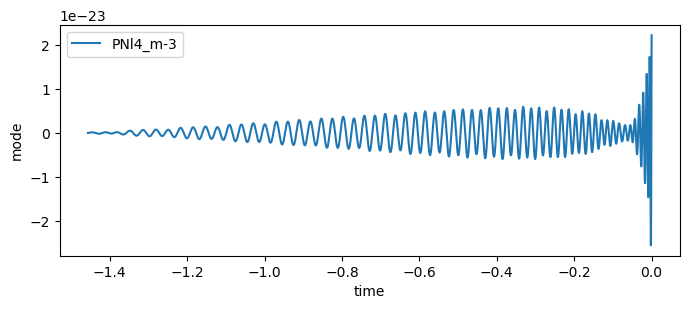

4 -2 6.633178366968572e-24


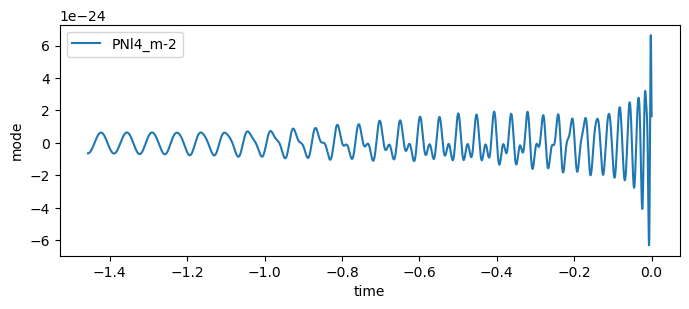

4 -1 1.0233063000639974e-24


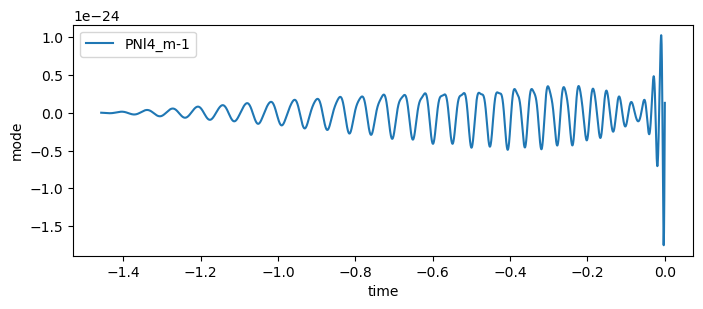

4 0 4.205927596124879e-25


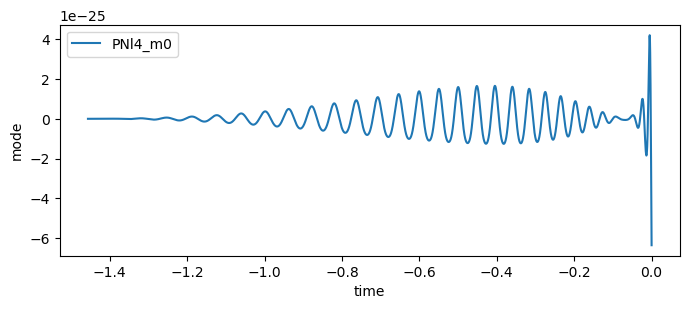

4 1 1.911137998298679e-24


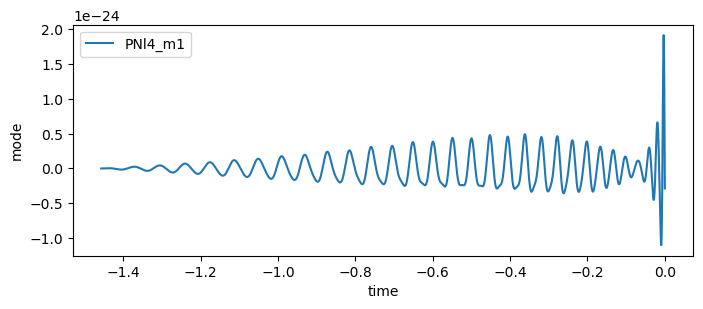

4 2 7.689242039146547e-24


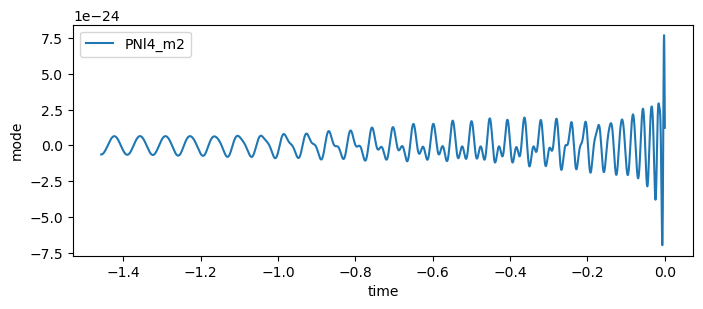

4 3 2.875914694307235e-23


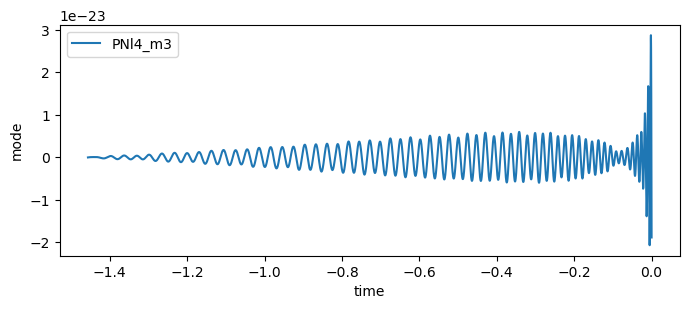

4 4 1.5167210460101975e-22


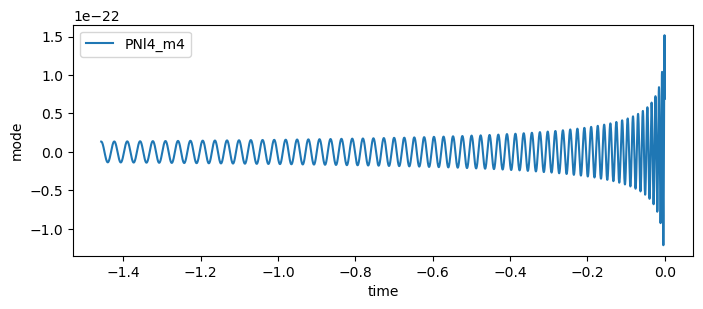

[[ 2.00000000e+00 -2.00000000e+00  4.40713789e-21]
 [ 2.00000000e+00 -1.00000000e+00  3.04136896e-22]
 [ 2.00000000e+00  0.00000000e+00  6.91912930e-23]
 [ 2.00000000e+00  1.00000000e+00  5.85661676e-22]
 [ 2.00000000e+00  2.00000000e+00  4.46067598e-21]
 [ 3.00000000e+00 -3.00000000e+00  3.01563055e-23]
 [ 3.00000000e+00 -2.00000000e+00  2.08551279e-23]
 [ 3.00000000e+00 -1.00000000e+00  6.82138473e-24]
 [ 3.00000000e+00  0.00000000e+00  3.40737088e-25]
 [ 3.00000000e+00  1.00000000e+00  7.59788010e-24]
 [ 3.00000000e+00  2.00000000e+00  3.44532478e-23]
 [ 3.00000000e+00  3.00000000e+00  3.81638290e-23]
 [ 4.00000000e+00 -4.00000000e+00  1.52259946e-22]
 [ 4.00000000e+00 -3.00000000e+00  2.23077032e-23]
 [ 4.00000000e+00 -2.00000000e+00  6.63317837e-24]
 [ 4.00000000e+00 -1.00000000e+00  1.02330630e-24]
 [ 4.00000000e+00  0.00000000e+00  4.20592760e-25]
 [ 4.00000000e+00  1.00000000e+00  1.91113800e-24]
 [ 4.00000000e+00  2.00000000e+00  7.68924204e-24]
 [ 4.00000000e+00  3.00000000e+

0

In [8]:
hlm_modes_given_param(qratio, Mtotal, spin1[0], spin1[1], spin1[2], spin2[0], 
                      spin2[1], spin2[2], frefHz, fmin, approximant='SpinTaylorT4', 
                      lmax=4, dist=300, model_name='PN')

In [15]:
T_NR, hlm_NR, T_MD, hlm_MD = get_hlm_NR_MD_from_data('SXS','PN')


In [16]:
Angles_NR, Angles_MD = get_Angels_NR_MD(hlm_NR, hlm_MD)



In [17]:

t0, phi0, psi0 = get_best_OptimizedResults(T_NR, T_MD , hlm_NR, hlm_MD, Angles_NR,Angles_MD,T_for_RigRot,10)



array of optimized func vals = [0.22072099 0.38368312 0.29576671 0.22013483 0.22072099 0.22072099
 0.22072099 0.38368806 0.29576873 0.22013567]
0.22013483121031155 -0.005896111583530284 -0.4820246647816334 1.5708115867396377


issue = 26122 25826 25826


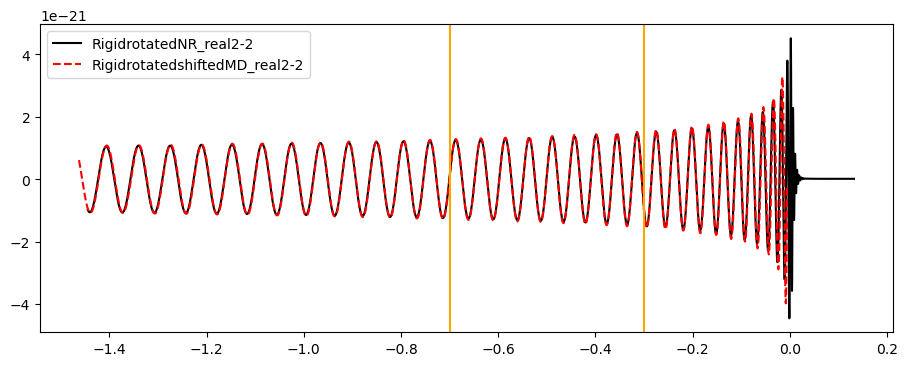

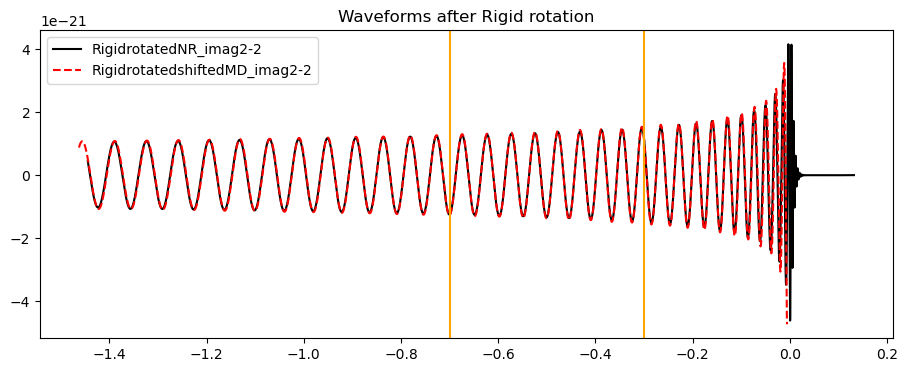

issue = 26122 25826 25826


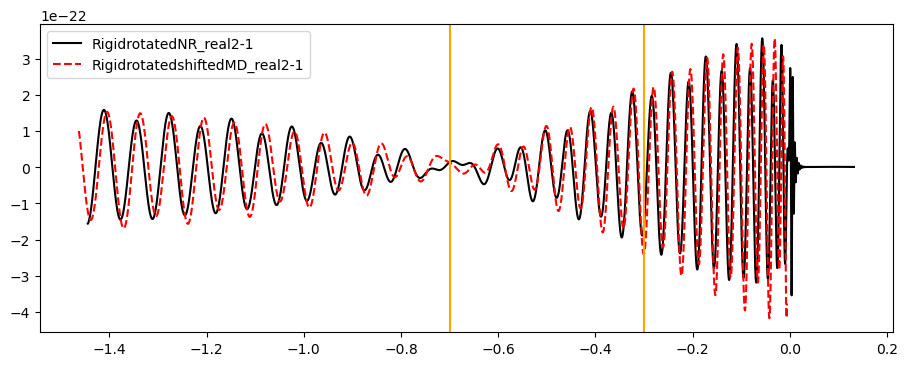

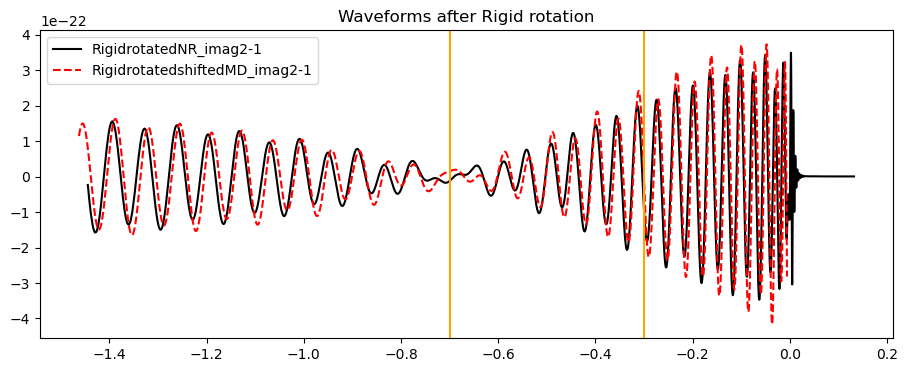

issue = 26122 25826 25826


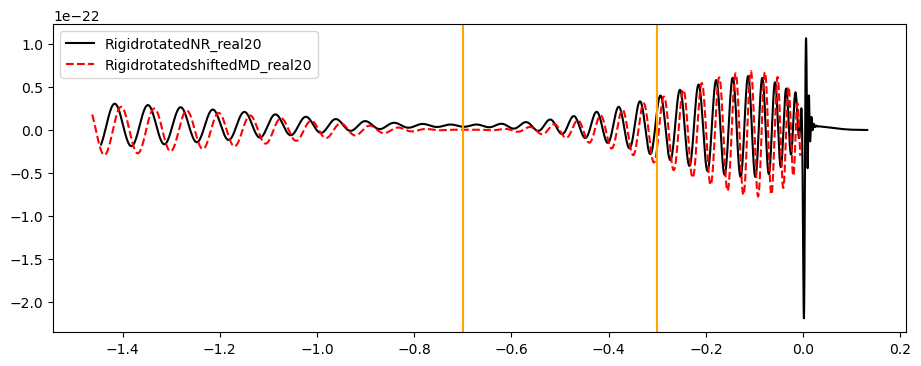

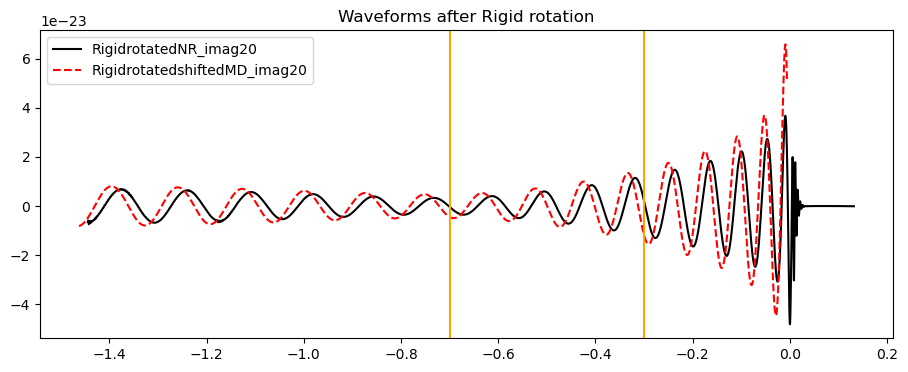

issue = 26122 25826 25826


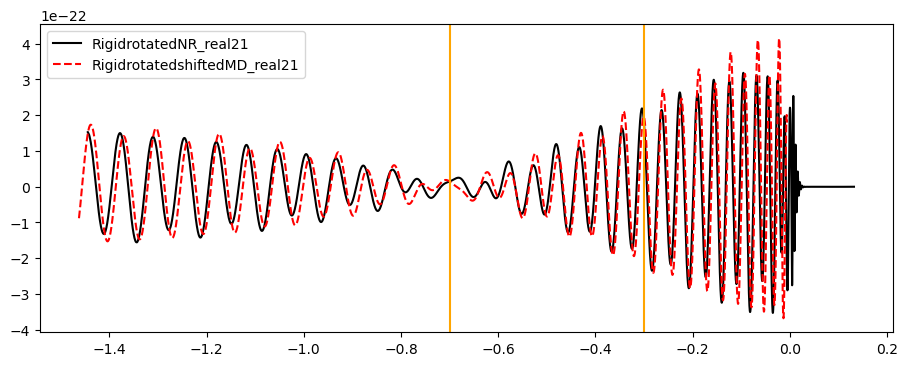

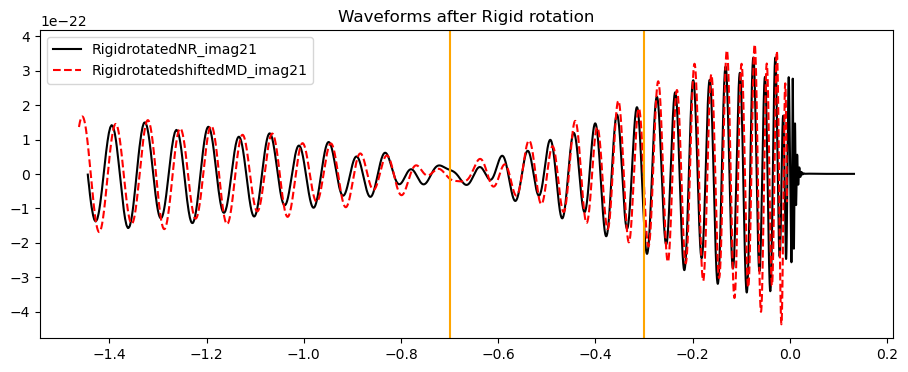

issue = 26122 25826 25826


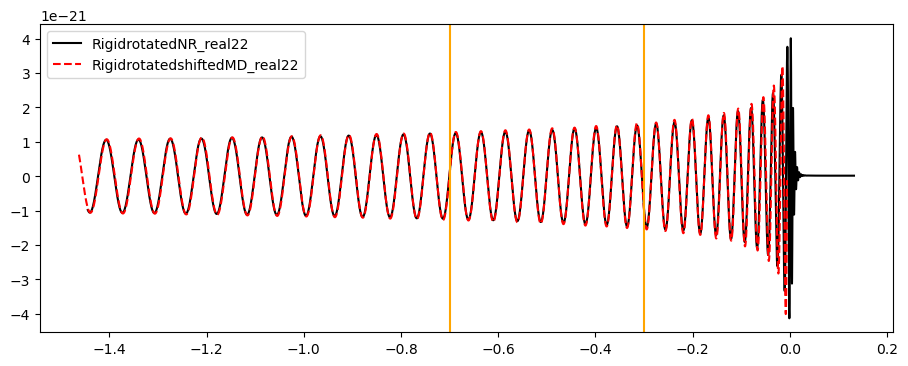

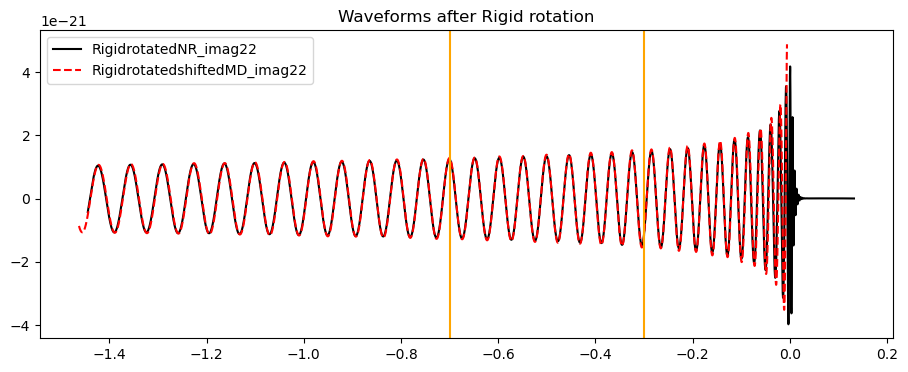

issue = 26122 25826 25826


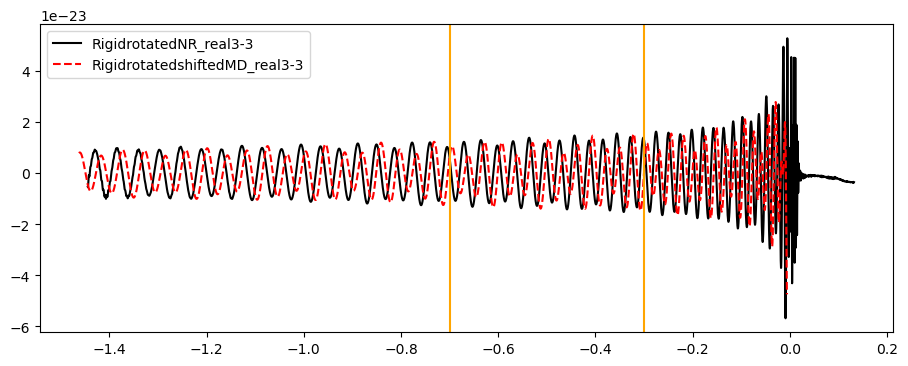

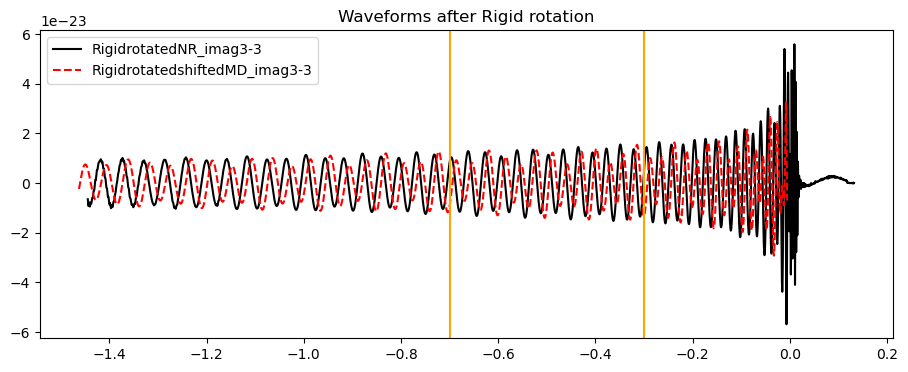

issue = 26122 25826 25826


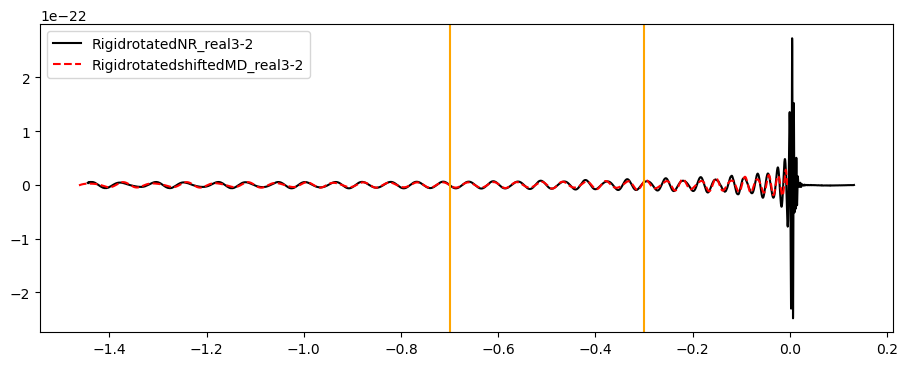

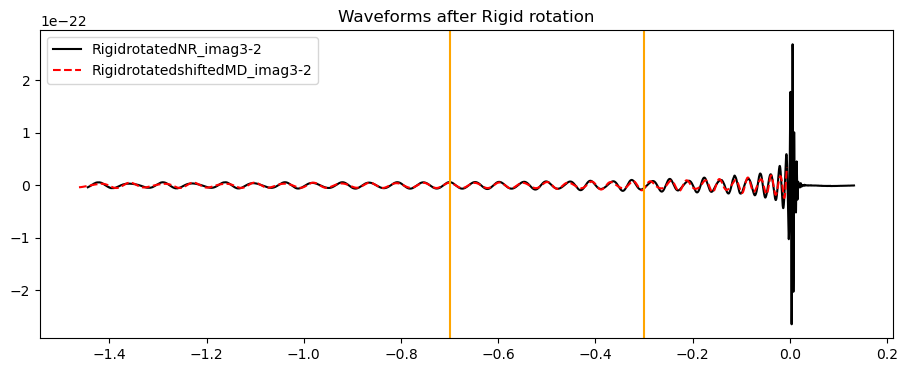

issue = 26122 25826 25826


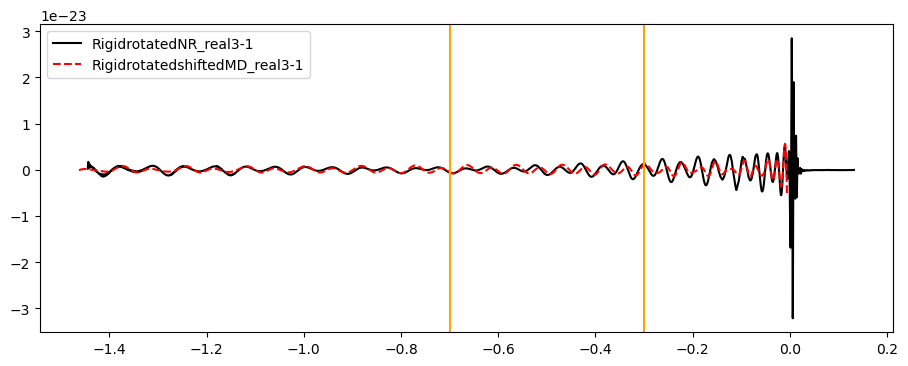

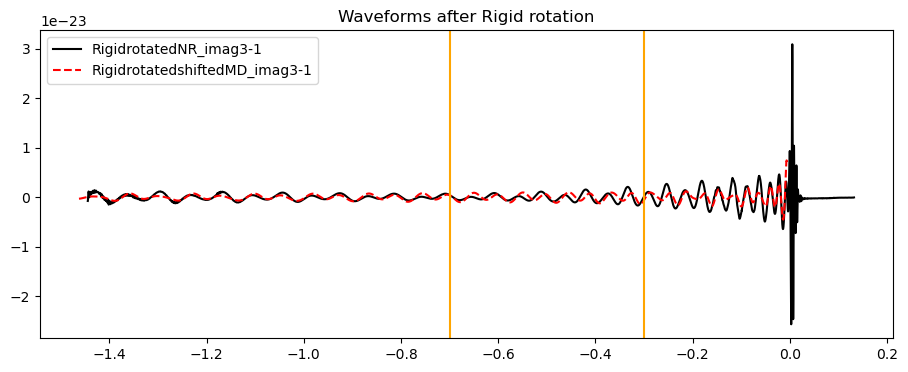

issue = 26122 25826 25826


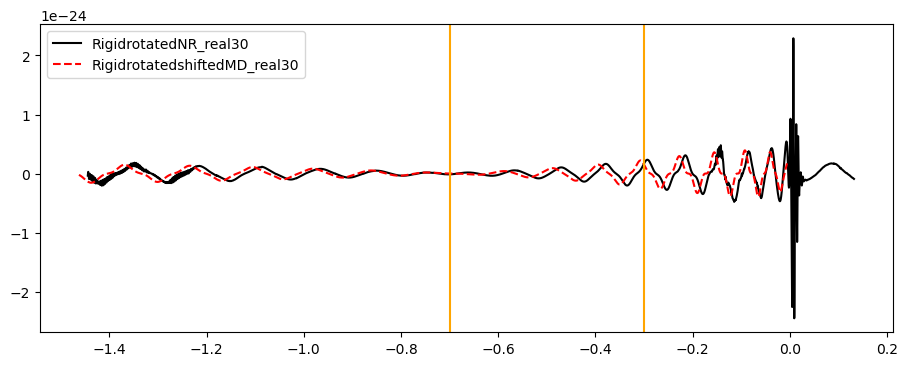

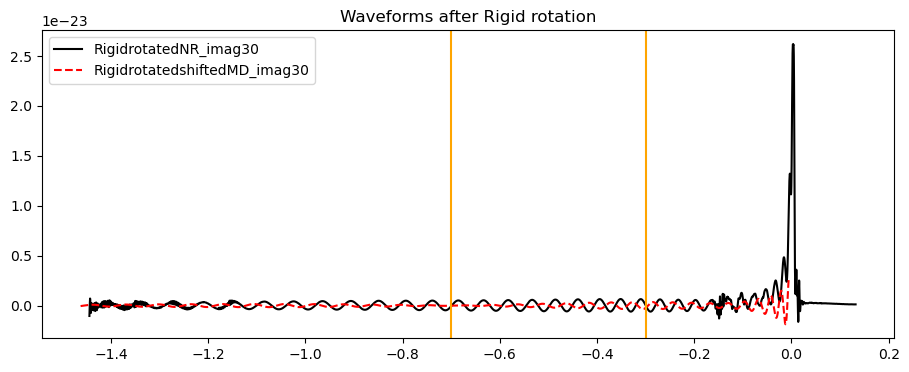

issue = 26122 25826 25826


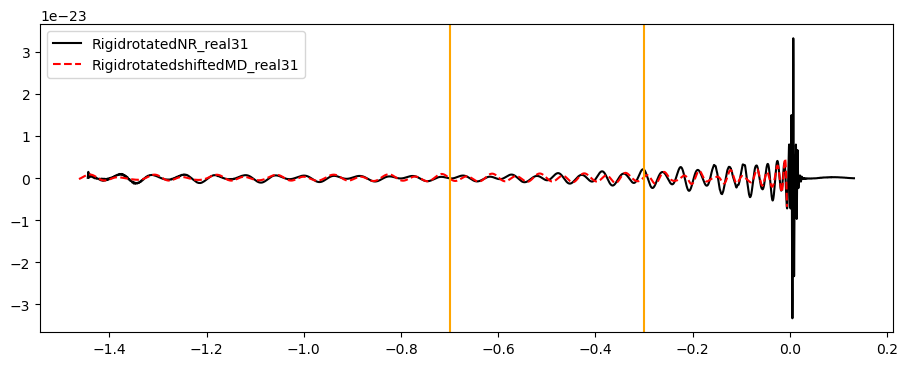

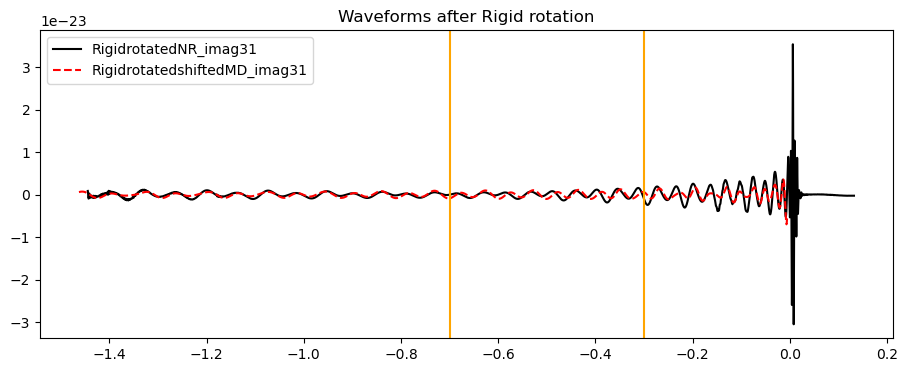

issue = 26122 25826 25826


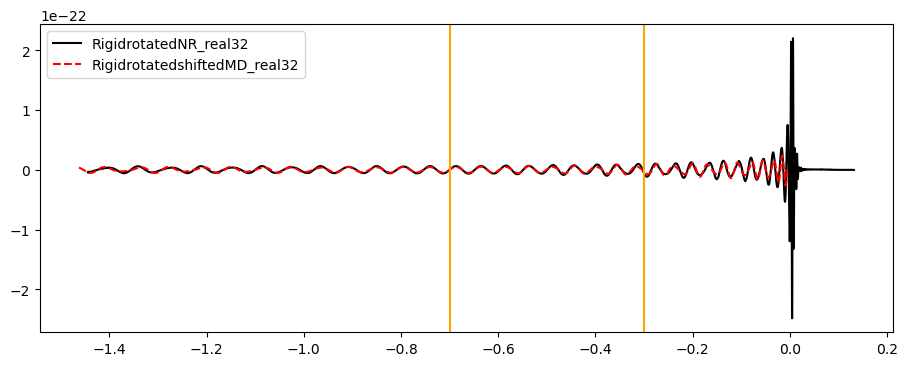

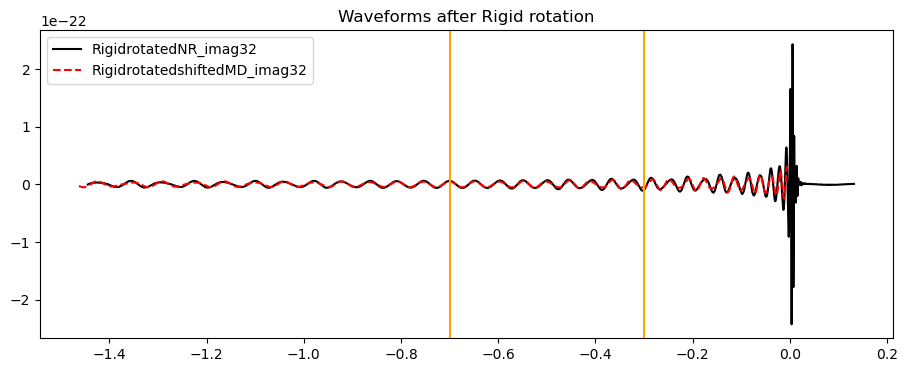

issue = 26122 25826 25826


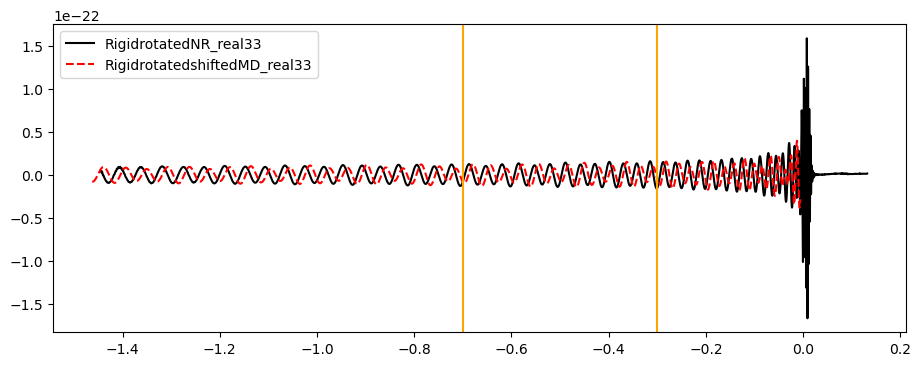

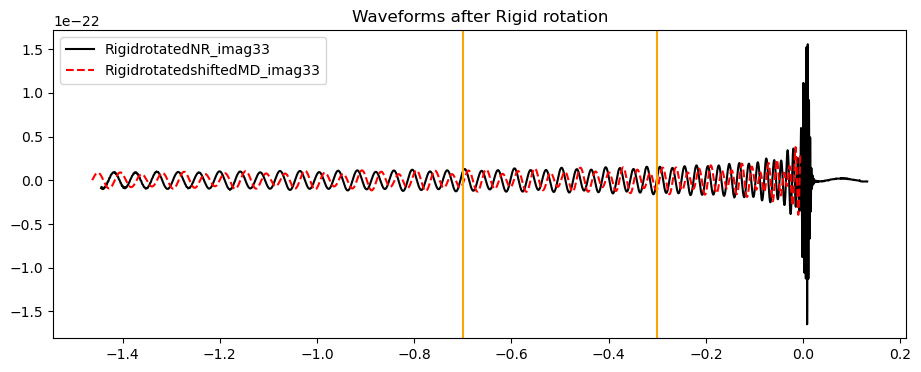

issue = 26122 25826 25826


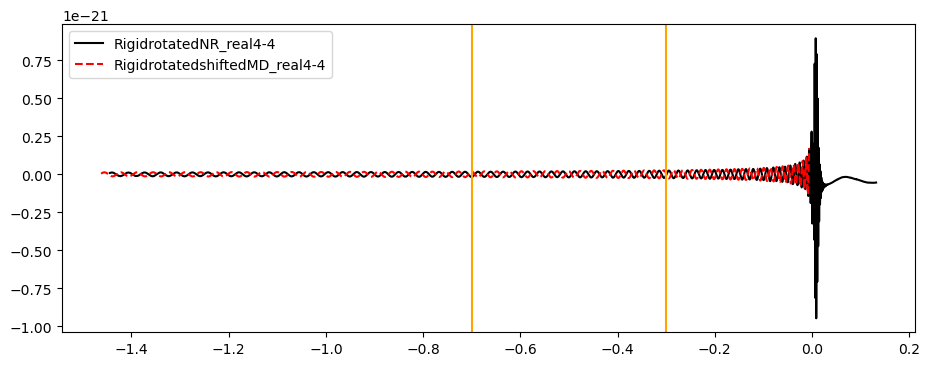

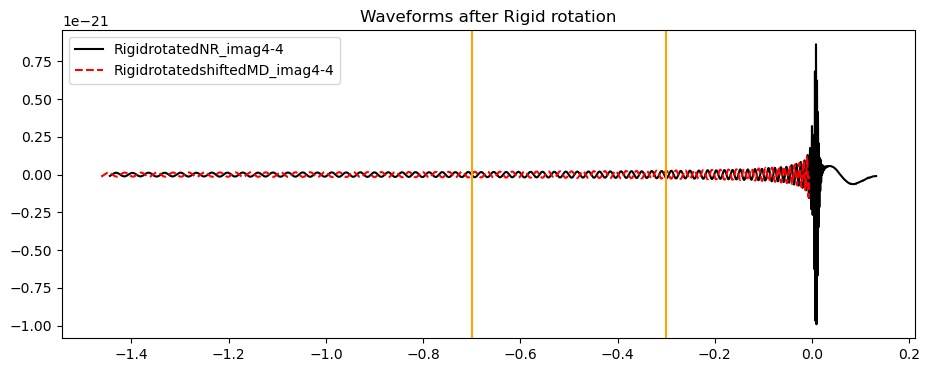

issue = 26122 25826 25826


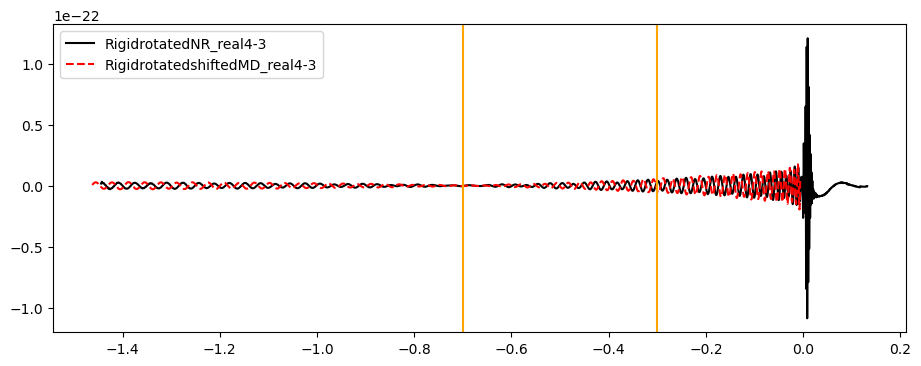

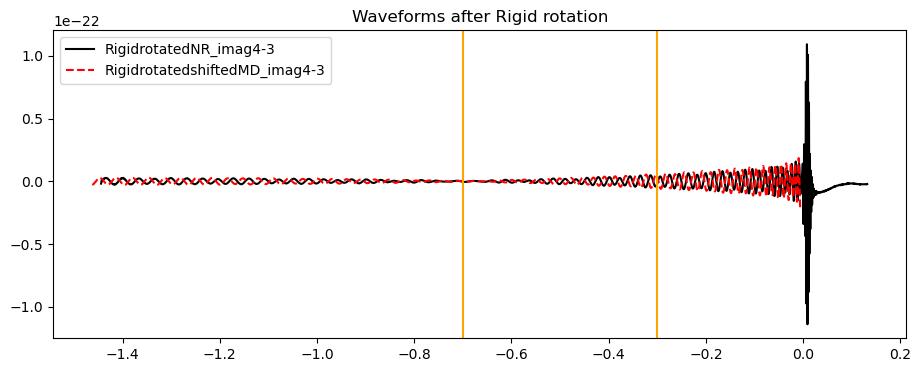

issue = 26122 25826 25826


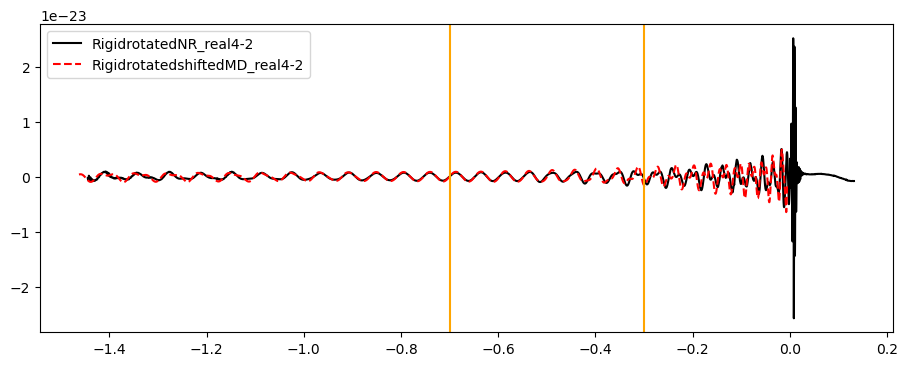

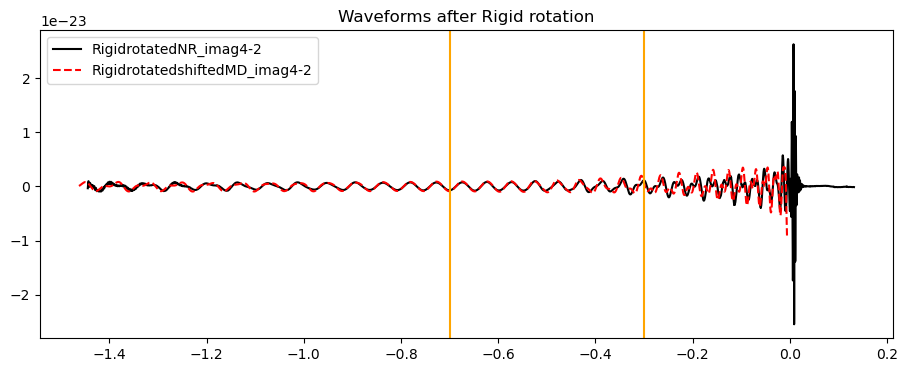

issue = 26122 25826 25826


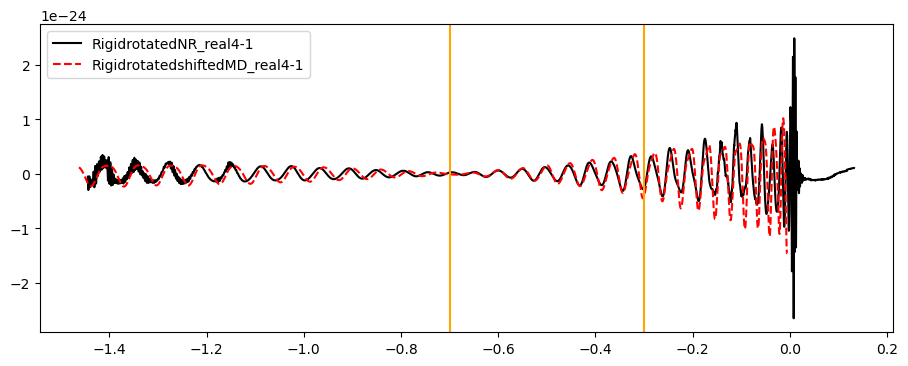

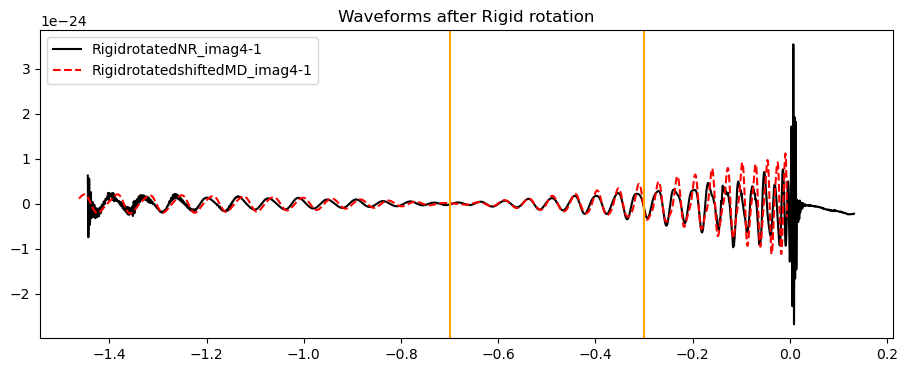

issue = 26122 25826 25826


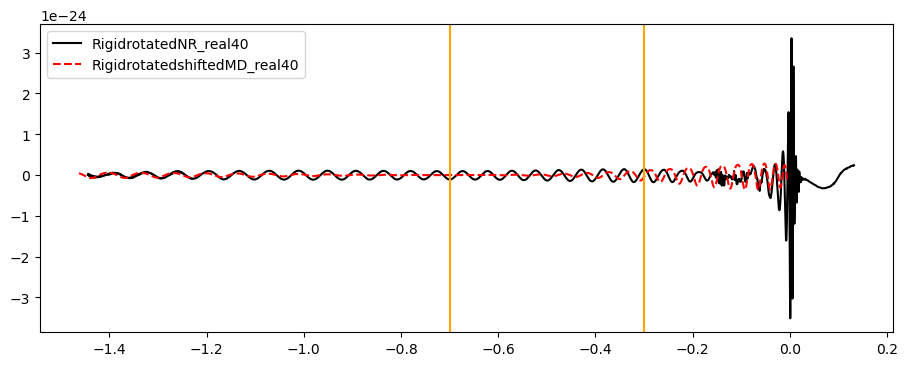

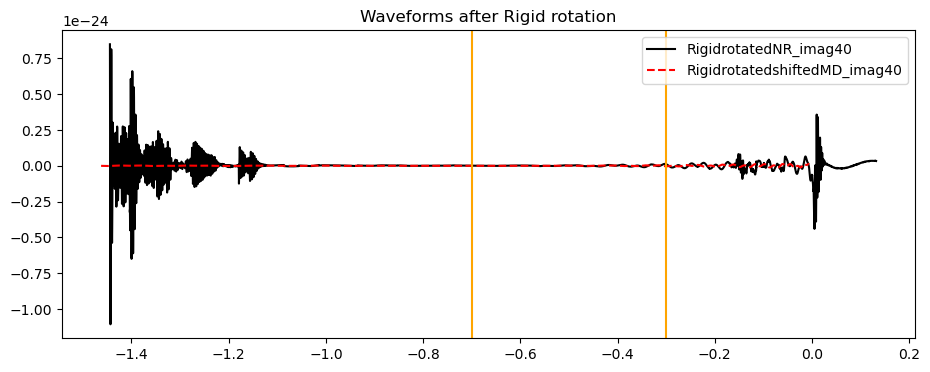

issue = 26122 25826 25826


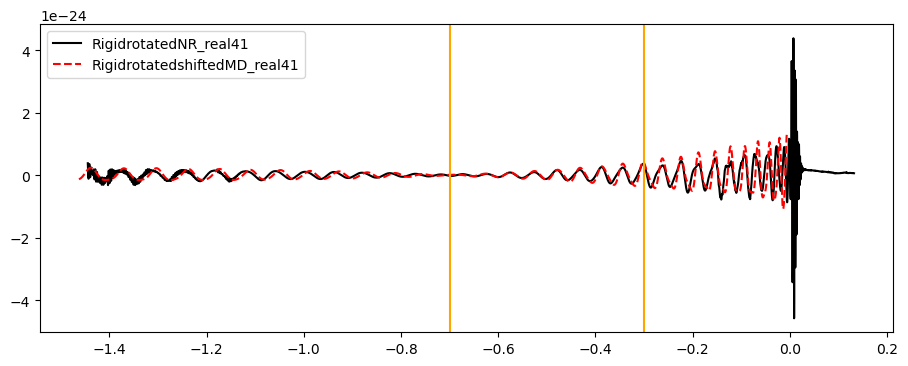

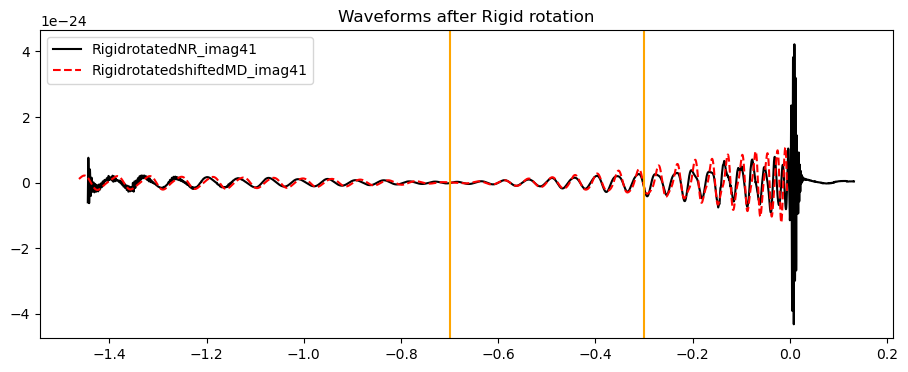

issue = 26122 25826 25826


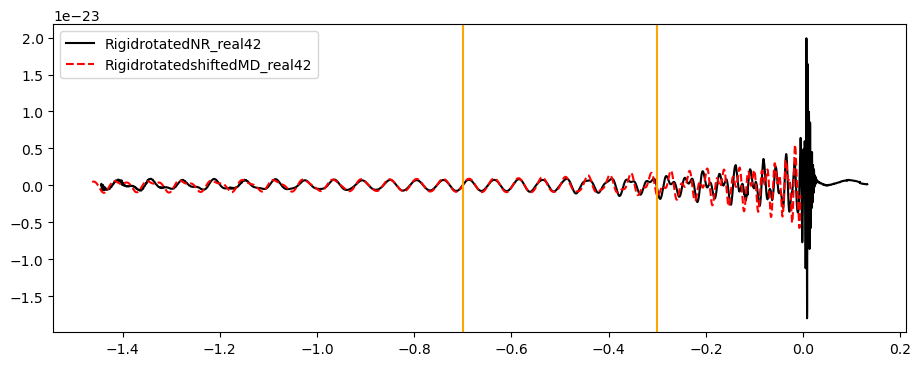

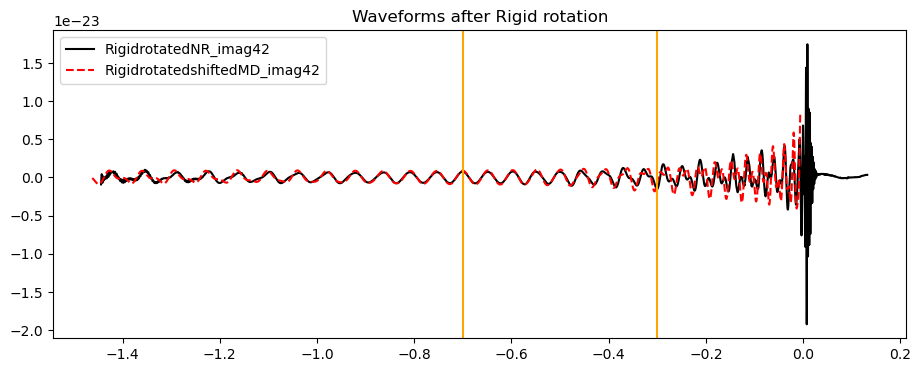

issue = 26122 25826 25826


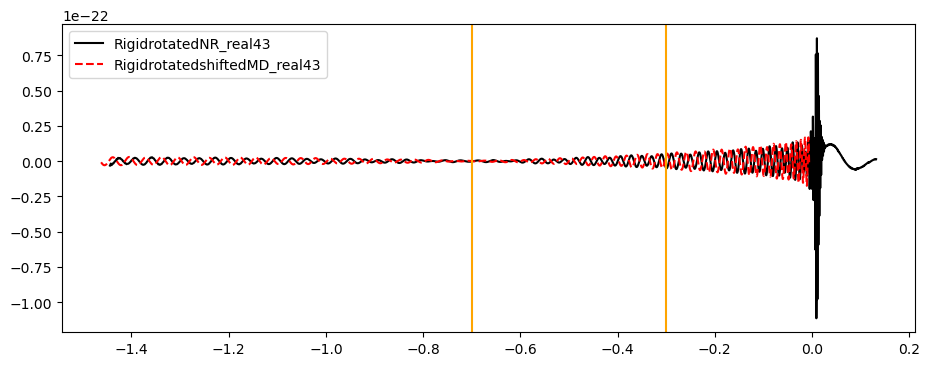

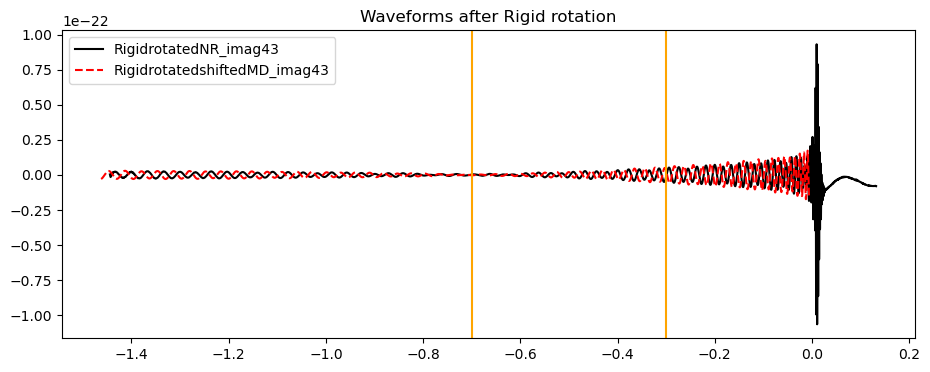

issue = 26122 25826 25826


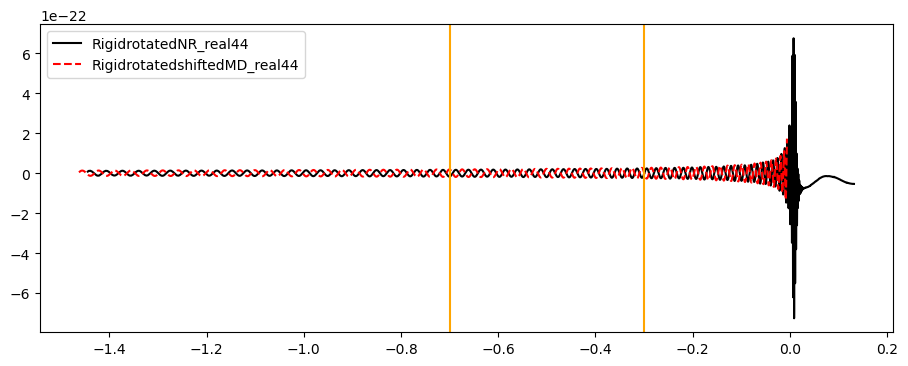

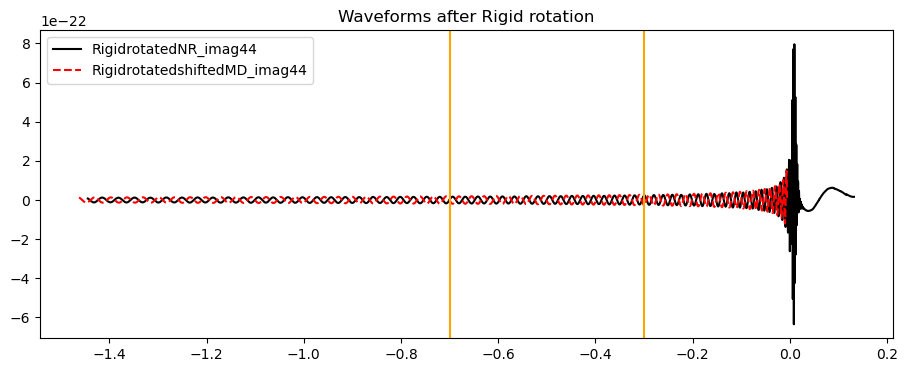

In [18]:


get_hyb_modes(T_NR, hlm_NR, T_MD, hlm_MD, Angles_NR, Angles_MD, t0, phi0, psi0, T_for_RigRot)